In [87]:
from core.metrics import *
from core.semcor_bert_pipeline import load_data
from core.analysis import annotate_mtx
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

In [3]:
shared_words = ['table', 'foot', 'degree', 'plane', 'model', 'right']

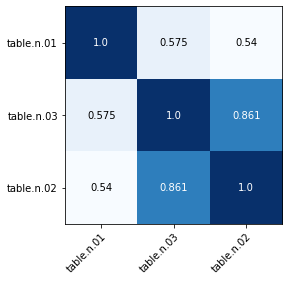

In [96]:
def cosine_sim_mtx(word, pos)
    data = load_data(word, pos, 'semcor')
    embeddings_by_sense = {}
    sense_indices = data['sense_indices']
    strip_synset = lambda s: s.strip("Synset()").strip("'")
    sense_names = [strip_synset(i) for i in data['sense_names']]
    word_embeddings = data['embeddings']
    word_embeddings = np.array([np.array(e) for e in word_embeddings])
    embeddings_by_sense[sense_names[0]] = np.array(word_embeddings[:sense_indices[0] - 1])
    for i in np.arange(1, len(sense_indices)):
        end = sense_indices[i]
        start = sense_indices[i - 1]
        embeddings_by_sense[sense_names[i]] = np.asarray(word_embeddings[start:end])

    result_mtx = []
    for i in sense_names:
        row = []
        for j in sense_names:
            dist = cs_centroids(embeddings_by_sense[i], embeddings_by_sense[j])
            row.append(dist)
        result_mtx.append(np.asarray(row))
    result_mtx = np.asarray(result_mtx)
    return result_mtx
    
ax = plt.axes()
im = ax.imshow(result_mtx)
annotate_mtx(result_mtx, im, ax, sense_names)